In [22]:
# to get file location
import os

# statistical work
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# optimization
from sklearn.feature_selection import SelectFromModel

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost

# cross validation
from sklearn.model_selection import cross_val_score

# checking results
from sklearn.metrics import accuracy_score

%matplotlib inline

In [5]:
df = pd.read_csv("Raisin_Dataset.csv")

In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [8]:
df.shape

(900, 8)

In [9]:
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [11]:
class_map = {'Kecimen':0, 'Besni':1}
df["Class"] = df["Class"].map(class_map)

In [12]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [18]:
print(len(df.loc[df['Area'] == 0]))
print(len(df.loc[df['MajorAxisLength'] == 0]))
print(len(df.loc[df['MinorAxisLength'] == 0]))
print(len(df.loc[df['Eccentricity'] == 0]))
print(len(df.loc[df['ConvexArea'] == 0]))
print(len(df.loc[df['Extent'] == 0]))
print(len(df.loc[df['Perimeter'] == 0]))

0
0
0
0
0
0
0


In [23]:
# dropping output column
X = df.drop("Class", axis = 1)

# considering only output column
y = df["Class"]

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

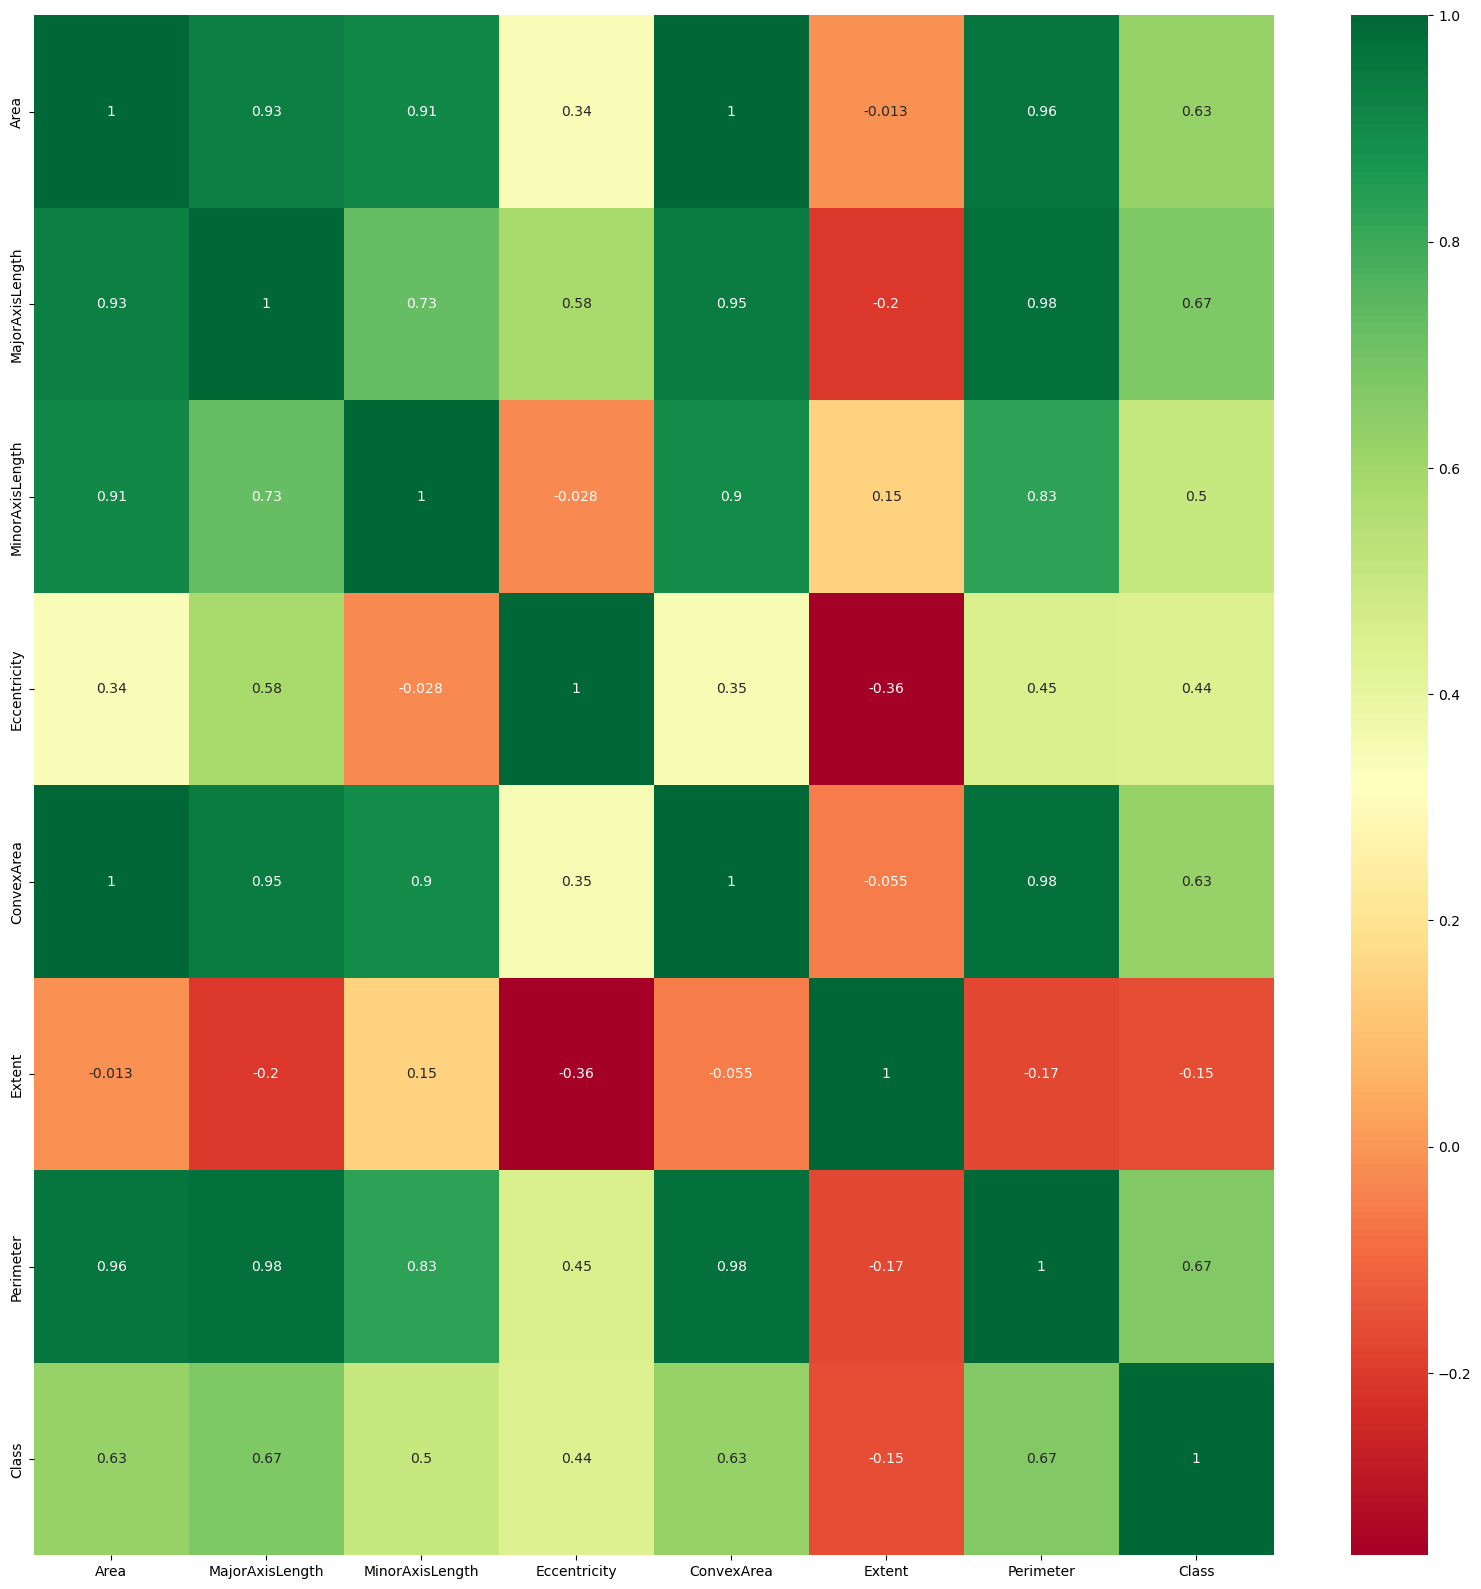

In [24]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")